In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [204]:
df=pd.read_csv('googleplaystore.csv')
df.head(2)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [205]:
df.shape

(10841, 13)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [207]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [208]:
df_copy=df.copy()

In [209]:
df_copy=df_copy.drop(df_copy.index[10472])

In [210]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [211]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [212]:
df_copy['Size'].isnull().sum()

np.int64(0)

In [213]:
# df_copy['Size']=df_copy['Size'].str.replace('M','000')
# df_copy['Size']=df_copy['Size'].str.replace('k','')
# df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
# df_copy['Size']=df_copy['Size'].astype(float)

In [214]:
# 1) turn “Varies with device” into an actual NaN
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)

# 2) strip off the “M”→“000” and “k”→“”
df_copy['Size'] = df_copy['Size'].str.replace('M', '000')
df_copy['Size'] = df_copy['Size'].str.replace('k', '')

# 3) coerce any non‑numeric string to NaN
df_copy['Size'] = pd.to_numeric(df_copy['Size'], errors='coerce')
df_copy = df_copy.dropna(subset=['Size'])
median_size = df_copy['Size'].median()
df_copy['Size'].fillna(median_size, inplace=True)



In [215]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [216]:
df_copy["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

In [217]:
df_copy["Price"].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49', '$1.29',
       '$5.00', '$13.99', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99',
       '$109.99', '$154.99', '$3.08', '$2.59', '$4.80', '$8.99', '$1.96',
       '$19.40', '$15.46', '$3.04', '$4.29', '$2.60', '$3.28', '$4.60',
       '$28.99', '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99',
       '$3.61', '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [218]:
character_Remove = ['+',',','$']
features = ['Price','Installs']

for item in character_Remove:
    for column in features:
        df_copy[column] = df_copy[column].str.replace(item,'')

In [219]:
df_copy['Price'] = df_copy['Price'].astype(float)
df_copy['Installs'] = df_copy['Installs'].astype(int)


In [220]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [221]:
df_copy["Year"] = df_copy["Last Updated"].str.split(",").str[-1]
df_copy["Month"] = df_copy["Last Updated"].str.split(" ").str[0]
df_copy["Date"] = df_copy["Last Updated"].str.split(",").str[0].str.split(" ").str[1]


In [222]:
df_copy["Year"] = df_copy["Year"].astype(int)

df_copy["Date"] = df_copy["Date"].astype(int)



In [223]:
df_copy.head(2)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018,January,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018,January,15


In [224]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018,January,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018,January,15


In [225]:
df_copy["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,         50,        100,        500,
               10,          1,          5, 1000000000,          0])

In [226]:
df_copy.to_csv("Cleaned_Google_PlayStore_Data")

In [227]:
df_copy[df_copy["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,1000,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN,2018,July,20
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1,10000,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN,2018,March,27


In [228]:
df_copy = df_copy[df_copy["Android Ver"].notnull()]


In [229]:
df_copy[df_copy["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Date


In [230]:
df_copy[df_copy.duplicated('App')].shape

(711, 16)

In [231]:
df_copy.drop_duplicates(subset=['App'],keep='first',inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8432 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8432 non-null   object 
 1   Category        8432 non-null   object 
 2   Rating          7027 non-null   float64
 3   Reviews         8432 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        8432 non-null   int64  
 6   Type            8432 non-null   object 
 7   Price           8432 non-null   float64
 8   Content Rating  8432 non-null   object 
 9   Genres          8432 non-null   object 
 10  Last Updated    8432 non-null   object 
 11  Current Ver     8424 non-null   object 
 12  Android Ver     8432 non-null   object 
 13  Year            8432 non-null   int64  
 14  Month           8432 non-null   object 
 15  Date            8432 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 1.1+ MB


In [232]:
numeric_feature = [features for features in df_copy.columns if df_copy[features].dtype != 'O' ]
Categorical_feature = [features for features in df_copy.columns if df_copy[features].dtype == 'O' ]

print(numeric_feature)
print(Categorical_feature)

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Year', 'Date']
['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Month']


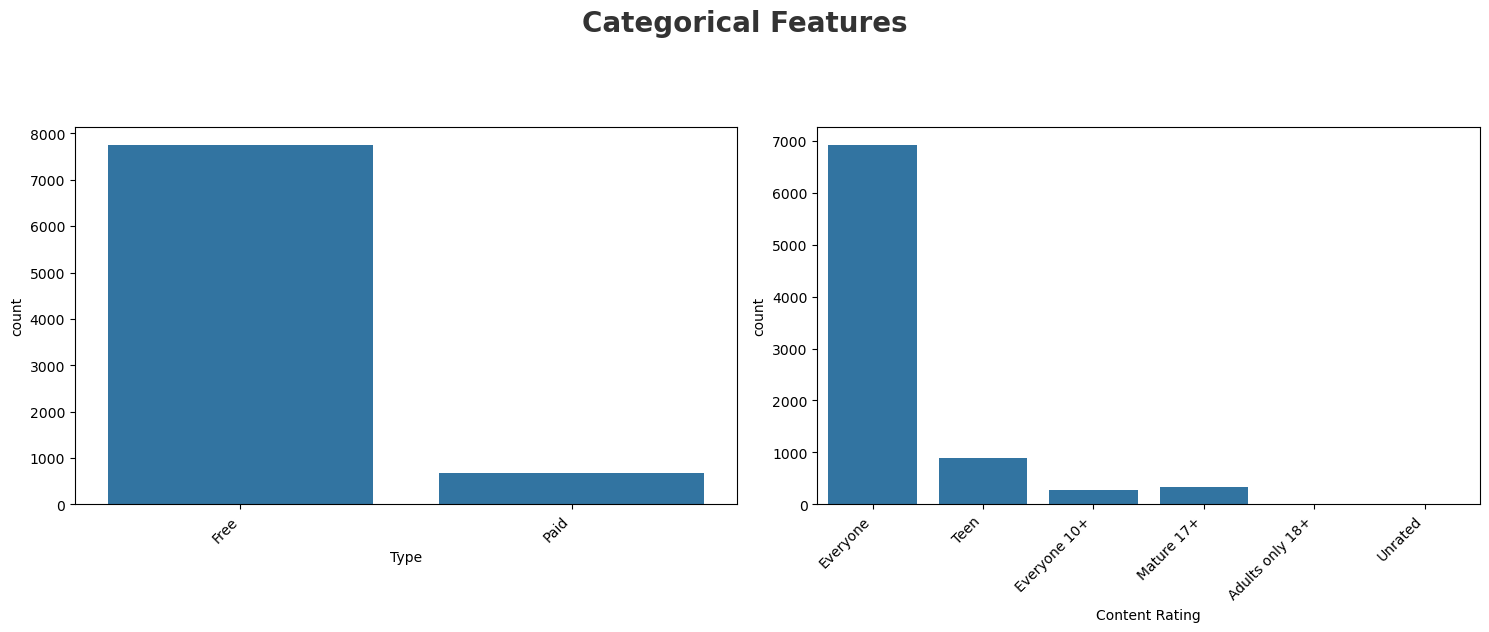

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns   # countplot lives in seaborn

# 1. Start a new figure (lower‑case “f”):
plt.figure(figsize=(15, 10))

# 2. Fix the spelling, and nudge the suptitle so it doesn’t overlap the subplots:
plt.suptitle(
    "Categorical Features", 
    fontsize=20, 
    fontweight='bold', 
    alpha=0.8, 
    y=1.02
)

# 3. List of the two columns you want to plot:
categories = ["Type", "Content Rating"]

# 4. Loop through them and draw a countplot for each:
for i, cat in enumerate(categories):
    ax = plt.subplot(2, 2, i + 1)            # 2×2 grid, position i+1
    sns.countplot(x=df_copy[cat], ax=ax)     # use sns.countplot, not plt.countplot
    ax.set_xlabel(cat)                       # label the x‑axis
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # tilt labels

# 5. Adjust layout once at the end so subtitles and axes don’t overlap:
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave room at top for suptitle

# 6. Finally show it:
plt.show()



In [246]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
